In [29]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [95]:
with open('../witb_42.pkl', 'rb') as f:
    data = pickle.load(f)  # might be pickle.load()

In [96]:
data.keys()

dict_keys(['n_total_docs', 'n_ok_docs', 'ngram', 'sonar', 'delimit', 'perplexity'])

In [149]:
delimitlist=[]
for n in data['delimit']:
    delimitlist.append(n[3])
print(len(delimitlist))

14435


In [156]:
sonarhate=[]
sonaroffense=[]
for n in data['sonar']:
    sonarhate.append(n[3])
    sonaroffense.append(n[4])

print(len(sonarhate))
print(len(sonaroffense))

14435
14435


In [122]:
for n in data['ngram']:
    print(n)

pornography
profanity
hate-speech


In [167]:
df = pd.DataFrame(columns=['Adult_Ngrams', 'Hate_Ngrams', 'Hate_Sonar', 'Hate_Delimit','Offense_Sonar', 'Profanity_Ngrams', 'Perplexity'])

In [170]:
df['Adult_Ngrams']= data['ngram']['pornography']
df['Hate_Ngrams']= data['ngram']['hate-speech']
df['Hate_Sonar']= sonarhate
df['Hate_Delimit']= delimitlist
df['Offense_Sonar']= sonaroffense
df['Profanity_Ngrams']= data['ngram']['profanity']

df['Perplexity']= data['perplexity'].astype(float)
df['Perplexity'] = df['Perplexity'].replace(-np.inf, np.nan)

In [171]:
df.head()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Offense_Sonar,Profanity_Ngrams,Perplexity
0,0,0,0.633842,0.039891,0.321085,13,563.1
1,0,0,0.597723,0.117794,0.358293,6,433.7
2,0,0,0.644680,0.029545,0.285813,0,117.2
3,0,0,0.631415,0.041085,0.329559,0,570.7
4,0,0,0.635234,0.040569,0.322880,0,606.5


In [175]:
df['Hate_Sonar'].describe()

count    14435.000000
mean         0.619468
std          0.040154
min          0.000000
25%          0.614679
50%          0.624951
75%          0.632290
max          0.896470
Name: Hate_Sonar, dtype: float64

In [189]:
df['Hate_Sonar'][df.Hate_Sonar > 0.5].count()

14282

In [176]:
df['Hate_Delimit'].describe()

count    14435.000000
mean         0.052376
std          0.023818
min          0.000000
25%          0.038723
50%          0.047301
75%          0.059238
max          0.583624
Name: Hate_Delimit, dtype: float64

In [190]:
df['Hate_Delimit'][df.Hate_Delimit > 0.5].count()

1

In [187]:
sonar = df['Hate_Sonar']
delimit = df['Hate_Delimit']
correlation = sonar.corr(delimit)
print(correlation)

-0.1447176620347382


In [184]:
df.corr()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Offense_Sonar,Profanity_Ngrams,Perplexity,Hate_Sonar_normalized,Hate_Delimit_normalized
Adult_Ngrams,1.000000,0.220705,-0.221270,0.244320,0.301585,0.571702,0.031113,-0.221270,0.244320
Hate_Ngrams,0.220705,1.000000,-0.091617,0.149909,0.122800,0.450147,0.015123,-0.091617,0.149909
Hate_Sonar,-0.221270,-0.091617,1.000000,-0.144718,-0.072371,-0.149040,-0.015100,1.000000,-0.144718
Hate_Delimit,0.244320,0.149909,-0.144718,1.000000,0.345542,0.230153,0.066395,-0.144718,1.000000
Offense_Sonar,0.301585,0.122800,-0.072371,0.345542,1.000000,0.203348,0.028268,-0.072371,0.345542
Profanity_Ngrams,0.571702,0.450147,-0.149040,0.230153,0.203348,1.000000,0.006790,-0.149040,0.230153
Perplexity,0.031113,0.015123,-0.015100,0.066395,0.028268,0.006790,1.000000,-0.015100,0.066395
Hate_Sonar_normalized,-0.221270,-0.091617,1.000000,-0.144718,-0.072371,-0.149040,-0.015100,1.000000,-0.144718
Hate_Delimit_normalized,0.244320,0.149909,-0.144718,1.000000,0.345542,0.230153,0.066395,-0.144718,1.000000


In [108]:
#normalizing sonar values
x = df[['Perplexity']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Perplexity_normalized'] = pd.DataFrame(x_scaled)

In [180]:
#normalizing sonar values
x = df[['Hate_Sonar']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Sonar_normalized'] = pd.DataFrame(x_scaled)

In [188]:
df['Hate_Delimit'].describe()

count    14435.000000
mean         0.052376
std          0.023818
min          0.000000
25%          0.038723
50%          0.047301
75%          0.059238
max          0.583624
Name: Hate_Delimit, dtype: float64

In [181]:
#normalizing sonar values
x = df[['Hate_Delimit']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Delimit_normalized'] = pd.DataFrame(x_scaled)

In [41]:
(df['Adult_Ngrams'][df.Adult_Ngrams > 0].count()) / (df['Adult_Ngrams'][df.Adult_Ngrams >= 0].count())

0.02570142015933495

In [43]:
(df['Profanity_Ngrams'][df.Profanity_Ngrams > 0].count()) / (df['Profanity_Ngrams'][df.Profanity_Ngrams >= 0].count())

0.6864565292691375

In [45]:
(df['Hate_Ngrams'][df.Hate_Ngrams > 0].count()) / (df['Hate_Ngrams'][df.Hate_Ngrams >= 0].count())

0.17499134049186008

In [21]:
df['Hate_Ngrams'][df.Hate_Ngrams > 1].count()

1392

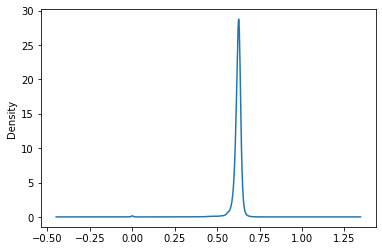

In [192]:
ax = df['Hate_Sonar'].plot.kde()

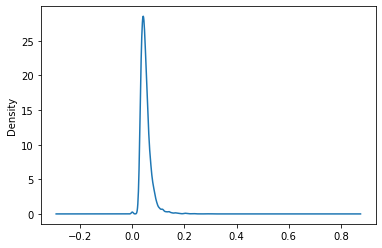

In [191]:
ax = df['Hate_Delimit'].plot.kde()

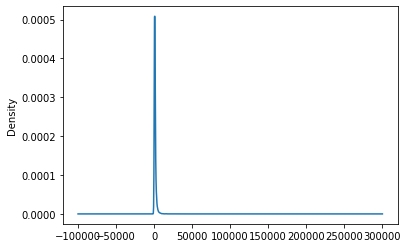

In [194]:
ax = df['Perplexity'].plot.kde()

In [116]:
df['Hate_Sonar_normalized'][df.Hate_Sonar_normalized > 0.5].count()

6